## Importing necessary libraries and data

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Data Overview

- Observations
- Sanity checks

In [76]:
df = pd.read_csv("ExtraaLearn.csv") #Loading the dataset
df.head() #checking the first 5 rows of the dataframe 

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [77]:
df.info() #checking the info of the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

- There are a total of 4612 observations and 15 columns in the dataset 
- All columns have the same amount of non-null values which means it is likely there are no values missing 
- Column values consist of a mixture of integers, decimals, and objects (most likely strings)

In [78]:
df.nunique() #checking the unique values in each column 

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

- ID seems to be a unique value for each lead which means we can drop this column because it won't contribute to the analysis
- Based on the number of unique values for each columns, we can make a good assumption on which columns are categorical vs. continuous 

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [79]:
df = df.drop(['ID'], axis=1) #Dropping ID column 
# df.info()

In [80]:
#Creating numerical columns 
num_cols = ['age','website_visits','time_spent_on_website','page_views_per_visit']

#Creating categorical columns
cat_cols = ['current_occupation','first_interaction','profile_completed','last_activity','print_media_type1','print_media_type2','digital_media','educational_channels','referral','status']


In [81]:
def detect_outliers(df, columns): #defining a fuction to return the outliers in each column
    ret = {}
    for col in columns:
        Q1 = df[col].quantile(0.25) 
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - (1.5*IQR)
        upper = Q3 + (1.5*IQR)
        ret[col] = df[(df[col] < lower) | (df[col] > upper)] #returning a dict of which values are out of the +- 1.5IQR range for each column

    return ret

In [82]:
outliers = detect_outliers(df, num_cols)
print("Number of outliers: ")
for col in outliers:
    print(col + ": " + str(outliers[col].shape[0])) #print the name of the column + the number of outliers 

Number of outliers: 
age: 0
website_visits: 154
time_spent_on_website: 0
page_views_per_visit: 257


- There are to 154 outliers in the website_visits and page_views_per_visit columns

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [83]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434


### Observations:
-   The average lead age is about 46 years old with ages ranging from 18 - 63. About 50% of leads are younger than 50
-   The average number of website_visits is about 3.6 with a relatively high standard deviation of 2.8 which can be due to the outliers detected earlier. Based on the outlier detection from earlier, this may mean the distribution is skewed right
-   The values for time_spent_on_website range from 0 to 2537 with about half of the values greater than 376
-   time_spent_on_website has a standard deviation greater than the mean
-   75% of page_views_per_visit values are less than 3.75 even though the values range from 0 to 18.43. This could possibly mean the distribution is skewed right since there are 257 outliers in the column 

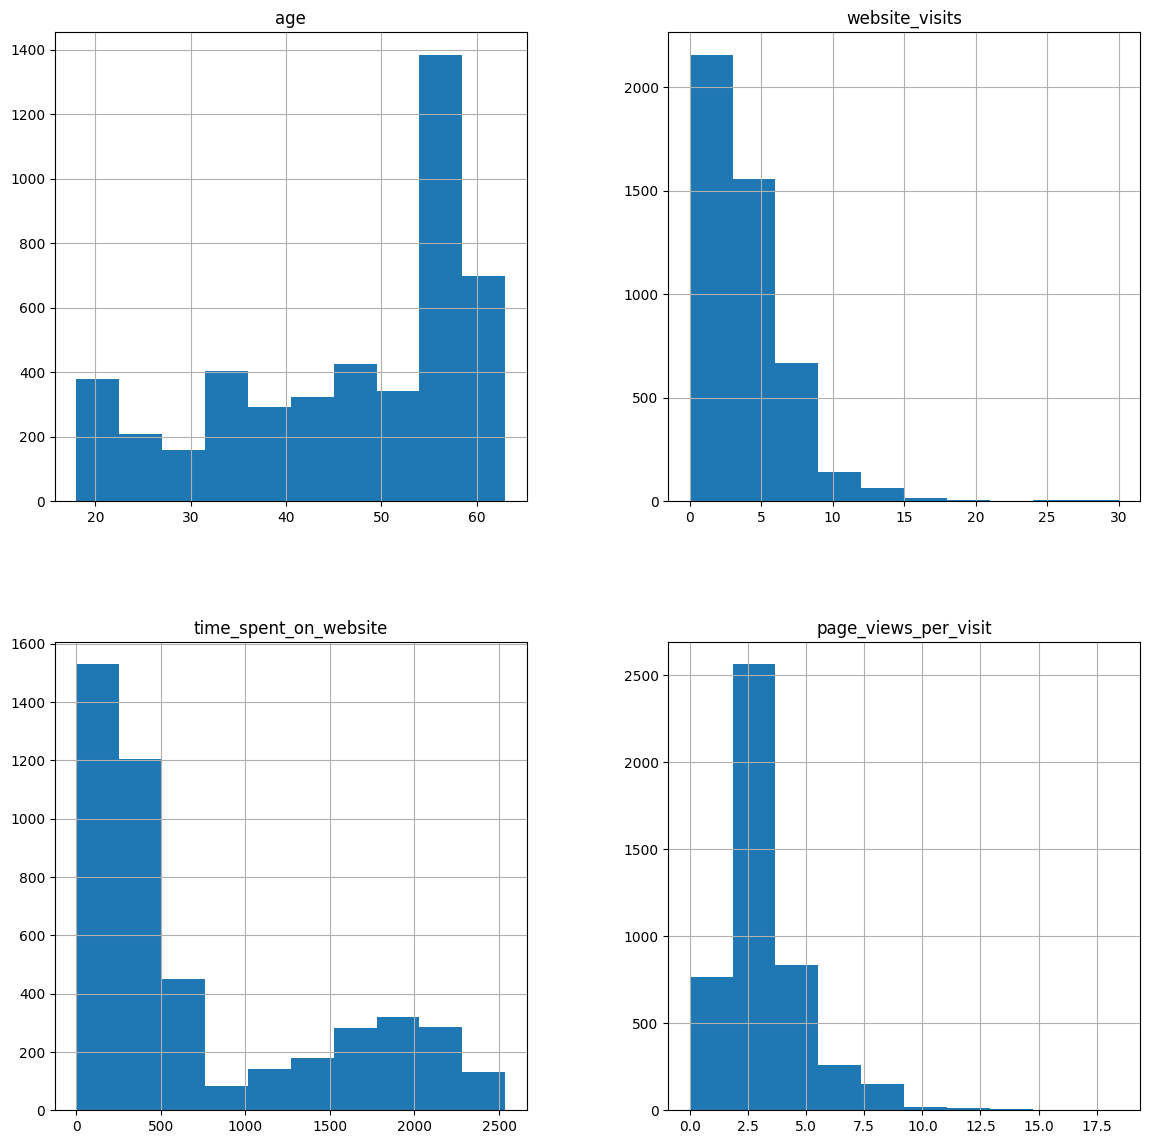

In [84]:
# Creating histograms
df[num_cols].hist(figsize=(14,14))
plt.show()

-   age seems to be skewed left with a good concentration of ages from 55 to 60 
-   website_visits indicates most visits are between 0 and 5 
-   time-spent on website is skewed to the right with a sort of normal distribution in the values ranging from 1000-2500 which might indicate that values from 0 - 1000 might have some sort of bias in them 
-   page_views_per_visit is somewhat skewed to the right with a peak about 2.5 

In [85]:
# Printing the % sub categories of each category
for i in cat_cols: #for each column in cat_cols
    print(df[i].value_counts(normalize=True)) #print the relative frequency within each category 
    print('-'*40)

current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
----------------------------------------
first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64
----------------------------------------
profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64
----------------------------------------
last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64
----------------------------------------
print_media_type1
No     0.892238
Yes    0.107762
Name: proportion, dtype: float64
----------------------------------------
print_media_type2
No     0.94948
Yes    0.05052
Name: proportion, dtype: float64
----------------------------------------
digital_media
No     0.885733
Yes    0.114267
Name: proportion, dtype: float64
----------------------------------------
educ

### Observations:
- More than half of the leads are Professionals followed by Unemployed and with a relatively small amount of students
- The division between Website and Mobile App as the method of first_interaction is almost evenly divided
- The division between High and Medium as levels of profile_completed also seem to be evenly divided with only 2% as Low
- Half of last_activity is taken by Email Activity while the other half is almost evenly divided between Phone Activity and Website Activity 
- 90% of leads had seen the ad in the newspaper 
- 95% of leads had seen the ad in the magazine 
- About 90% of leads had seen the ad through digital media 
- About 85% of leads had heard of ExtraaLearn through education channels 
- About 98% of leads had heard of ExtraaLearn through a referral 
- About 70% of leads had turned into paying customers

###  Bivariate and Multivariate Analysis

I will start off by checking how does the status rate relates to other categorical variables 

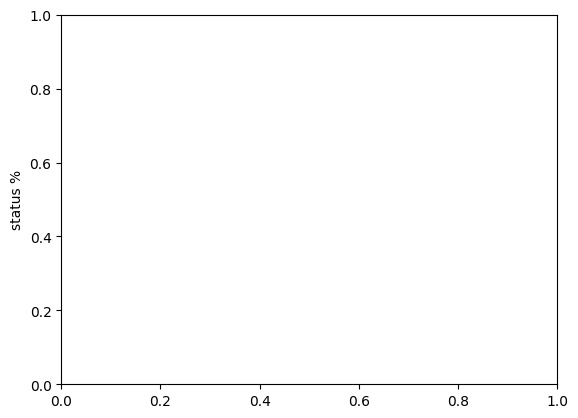

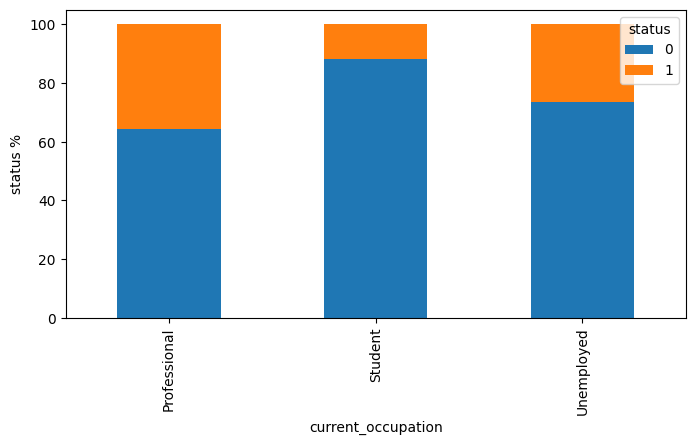

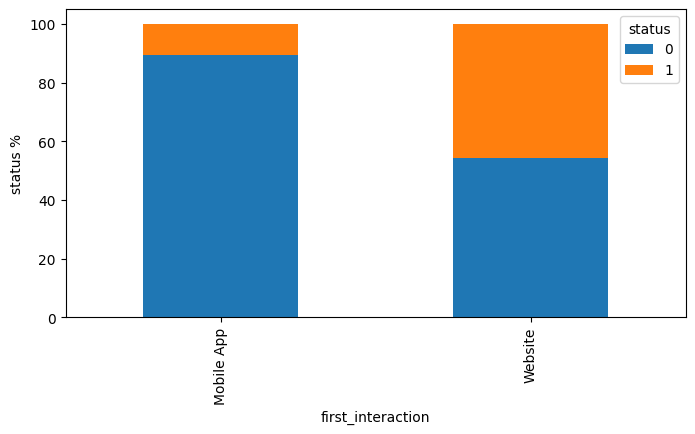

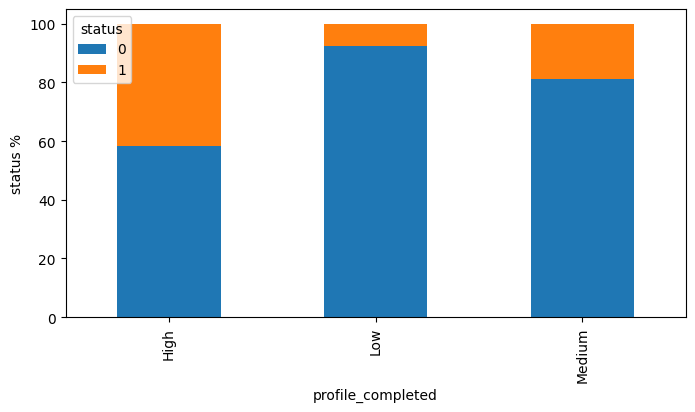

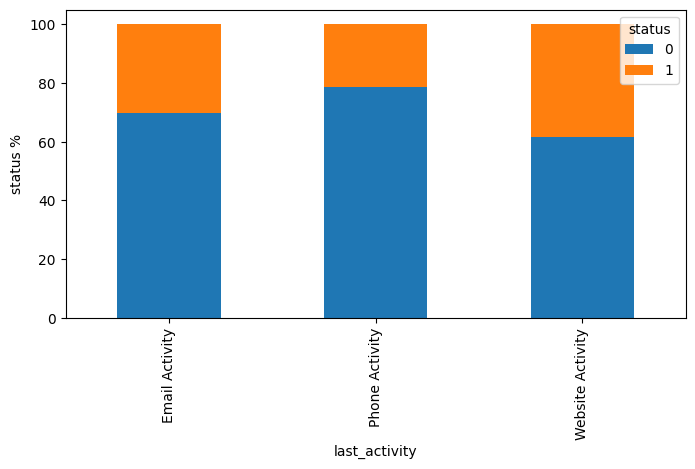

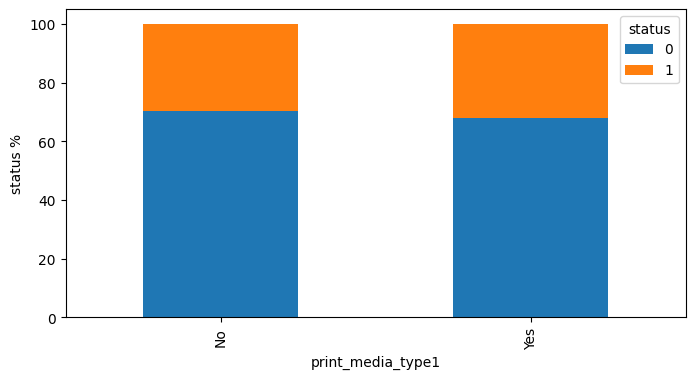

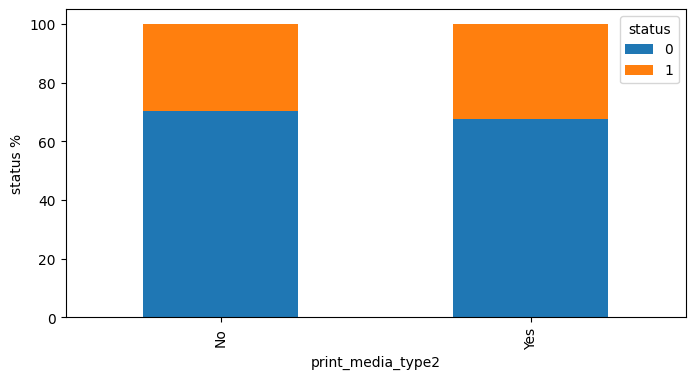

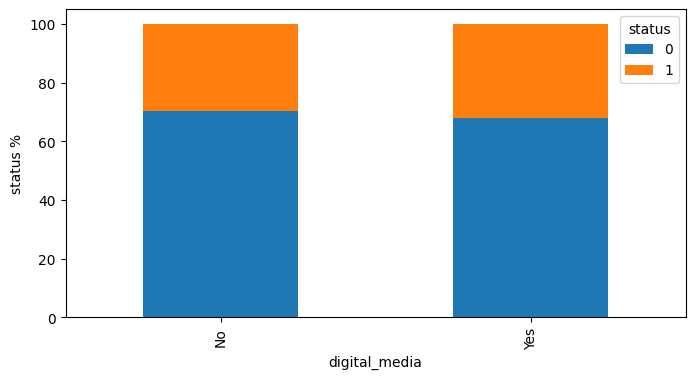

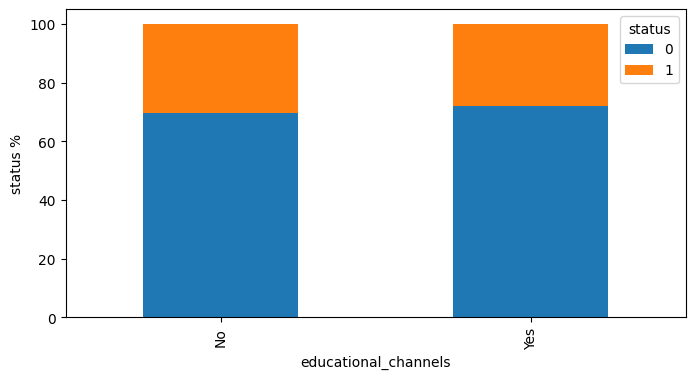

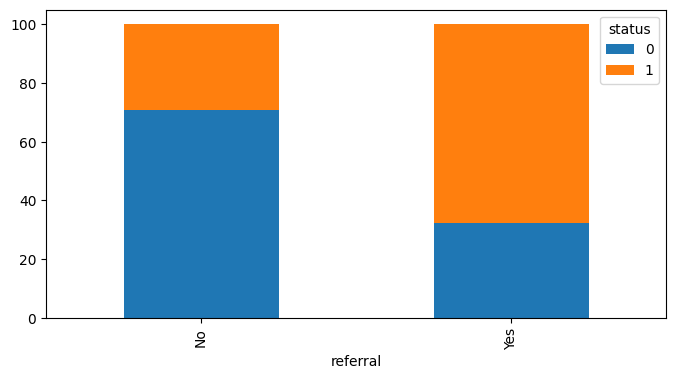

In [86]:
for i in cat_cols: #for each column in cat_cols
    if i != 'status': #if the column is not status create a cross-tab detailing how status is distributed across each category
        plt.ylabel('status %')
        (pd.crosstab(df[i],df['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)

- Orange means Yes; Blue means No 
- Leads that had a referral seem too have a much higher chance of becoming paying customers in comparison to leads who did not have a referral; Referral seems to be the most effective channel (Question 4)
- Leads who had a first_interaction through a Mobile app have noticeably higher chances of not becoming a customer in comparison to a Website first_interaction (Question 2)
- Professionals are most likely to become customers and students are least likely (Question 1)
- Leads who have a High profile_completed are most likely to become customers; This suggests increased info on a lead can lead to a better chance of becoming a paying customer (Question 5)
- Leads with their last_activity as Website Activity are most likely to become customers 
- print_media_type1, print_media_type2, digital_media, and educational_channels seem to have similar percentages of status regardless of the response with a 70/30 split (70% of each subcategory have a 0 status)

In [87]:
df.groupby(['status'])[num_cols].mean() #calculate the mean of the values in num_cols for each value in status 

,age,website_visits,time_spent_on_website,page_views_per_visit
status,,,,
0,45.153014,3.578980,577.420711,3.025732
1,48.663762,3.538126,1068.397967,3.027050


- Leads that became customers seem to a bit older on average and have almost double the amount of time spent on the website 

#### Through the analysis so far, it seems current_occupation, first_interaction, profile_completed, referral, time_spent_on_website, and age have an effect on status rate 

<Axes: >

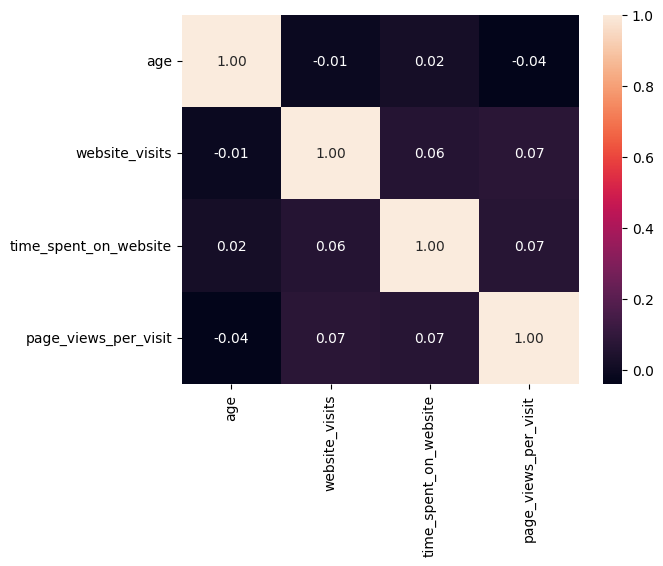

In [88]:
# Plotting the correlation between numerical variables
sns.heatmap(df[num_cols].corr(),annot=True, fmt='0.2f')

- All numerical variables have low correlation with each other so we don't have to tweak the dataset yet 

## Building a Decision Tree model

##### Data Preparation
- Creating dummy variables for categorical variables 

In [89]:

#Creating a list of dummy columns 
get_dummies = ['current_occupation','first_interaction','profile_completed','last_activity']


#creating dummy columns 
df = pd.get_dummies(data = df, columns = get_dummies, drop_first = True)   
# print(df.info())


#mapping print_media_type1, print_media_type2, digital_media, educational_channels, and status 
dict_pm1 = {'Yes': 1, 'No':0}
dict_pm2 = {'Yes': 1, 'No':0}
dict_digital_media = {'Yes': 1, 'No':0}
dict_Educational = {'Yes': 1, 'No':0}
dict_referral = {'Yes': 1, 'No':0}

#Applying the mappings 
df['print_media_type1'] = df.print_media_type1.map(dict_pm1)
df['print_media_type2'] = df.print_media_type2.map(dict_pm2)
df['digital_media'] = df.digital_media.map(dict_digital_media)
df['educational_channels'] = df.educational_channels.map(dict_Educational)
df['referral'] = df.referral.map(dict_referral)

##### Setting the independent (X) and dependent variables (Y)

In [90]:
# Separating target variable and other variables
Y= df.status
X= df.drop(columns = ['status'])

##### Splitting the data into a 70/30 - train/test split with stratified sampling technique
- Decision trees do not require feature scaling since it is not sensitive to the variance in the data 

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

#### Model evaluation criterion 
The model can make 2 types of wrong predictions:
1. Predicting a lead has the status of a paying customer while they are not a paying customer
2. Preadicting a lead does not have the status of a paying customer while they are a paying customer


#### Predicting that a lead will not be a paying customer while they are (false negative) is an important class of prediction and so we would want to reduce error in this area 
- A solution would be to maximize the Recall - identify the true positives very well

#### I will code a function to calculate and print the classification report and confusion matrix before creating the model 



In [92]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Status: no', 'Status: yes'], yticklabels=['Status: no', 'Status: yes'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [93]:
#Building the decision tree model 
dt = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

In [94]:
#Fitting decision tree model 
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

##### Checking model performance on training dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



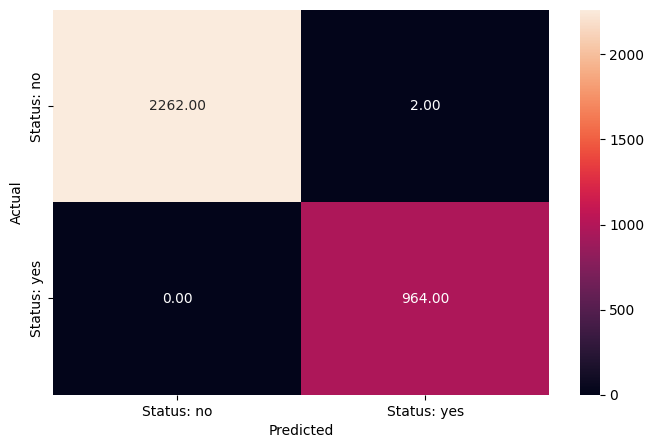

In [95]:
y_train_pred_dt = dt.predict(X_train)
metrics_score(y_train, y_train_pred_dt)

##### The decision tree is giving a 100% score for all metrics on the training dataset 

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       971
           1       0.67      0.65      0.66       413

    accuracy                           0.80      1384
   macro avg       0.76      0.76      0.76      1384
weighted avg       0.80      0.80      0.80      1384



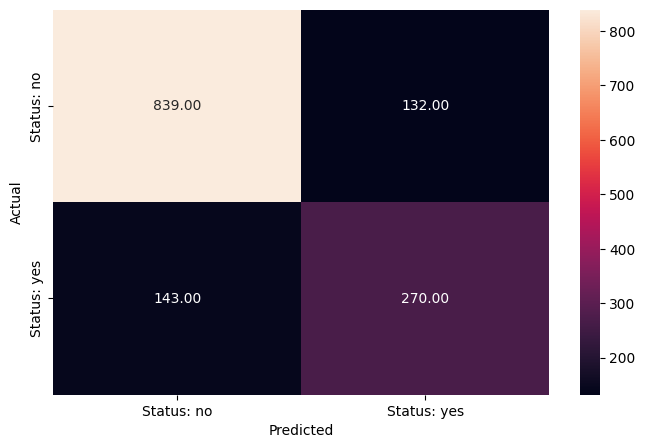

In [96]:
y_test_pred_dt = dt.predict(X_test)
metrics_score(y_test, y_test_pred_dt)

- The decision tree does not work as well on the test dataset since the recall is 0.86 and 0.65 in comparison to 1 which means the decision tree is noticeably overfitting the data 
- The precision on the test data suggests that there is a 15% chance the model will predict a lead will be a paying customer while they are not
- The precision on the test data also suggests there is a 33% chance the model will predict a lead will not be a paying customer while they are 

### Tuning the model 

In [97]:
# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, max_depth=np.int64(2),
                       min_samples_leaf=5, random_state=1)

              precision    recall  f1-score   support

           0       1.00      0.36      0.53      2264
           1       0.40      1.00      0.57       964

    accuracy                           0.55      3228
   macro avg       0.70      0.68      0.55      3228
weighted avg       0.82      0.55      0.54      3228



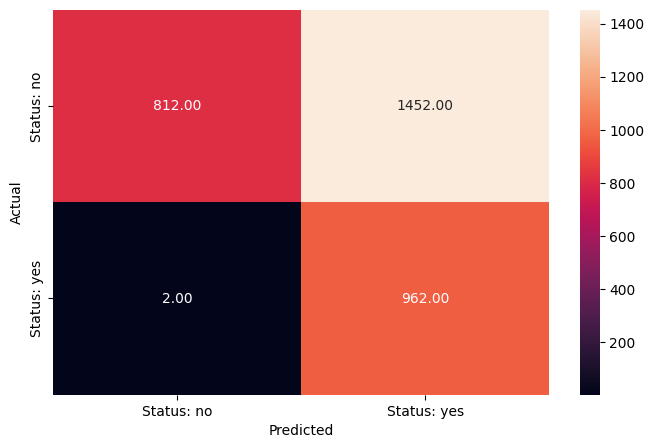

In [98]:
# Checking performance on the training dataset
y_train_pred_dt = dtree_estimator.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

- In comparison to the original model, the tuned model's performance has went down signficantly on the training set. Let's see how it performs on the test set

              precision    recall  f1-score   support

           0       0.99      0.34      0.50       971
           1       0.39      0.99      0.56       413

    accuracy                           0.53      1384
   macro avg       0.69      0.66      0.53      1384
weighted avg       0.81      0.53      0.52      1384



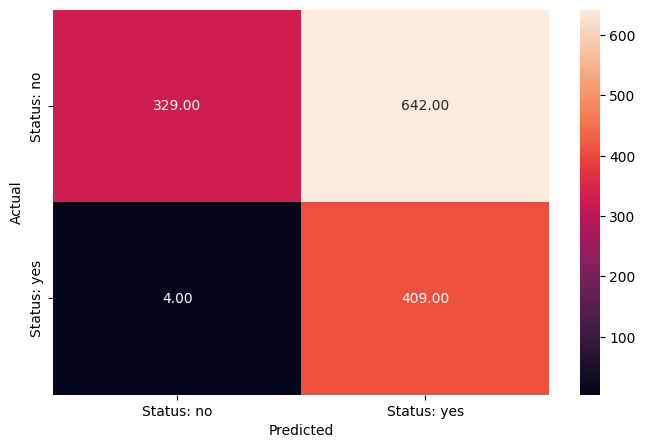

In [99]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_estimator.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

- The tuned model is not performing as well as the original model with hyperparameters. 
- Since it seems the model is underfitting on the training data, it is also performing poorly on the testing data 
- There seems to be bias because either the precision or the recall is high for each class; there is not a balance

### Plotting feature importance of tuned model

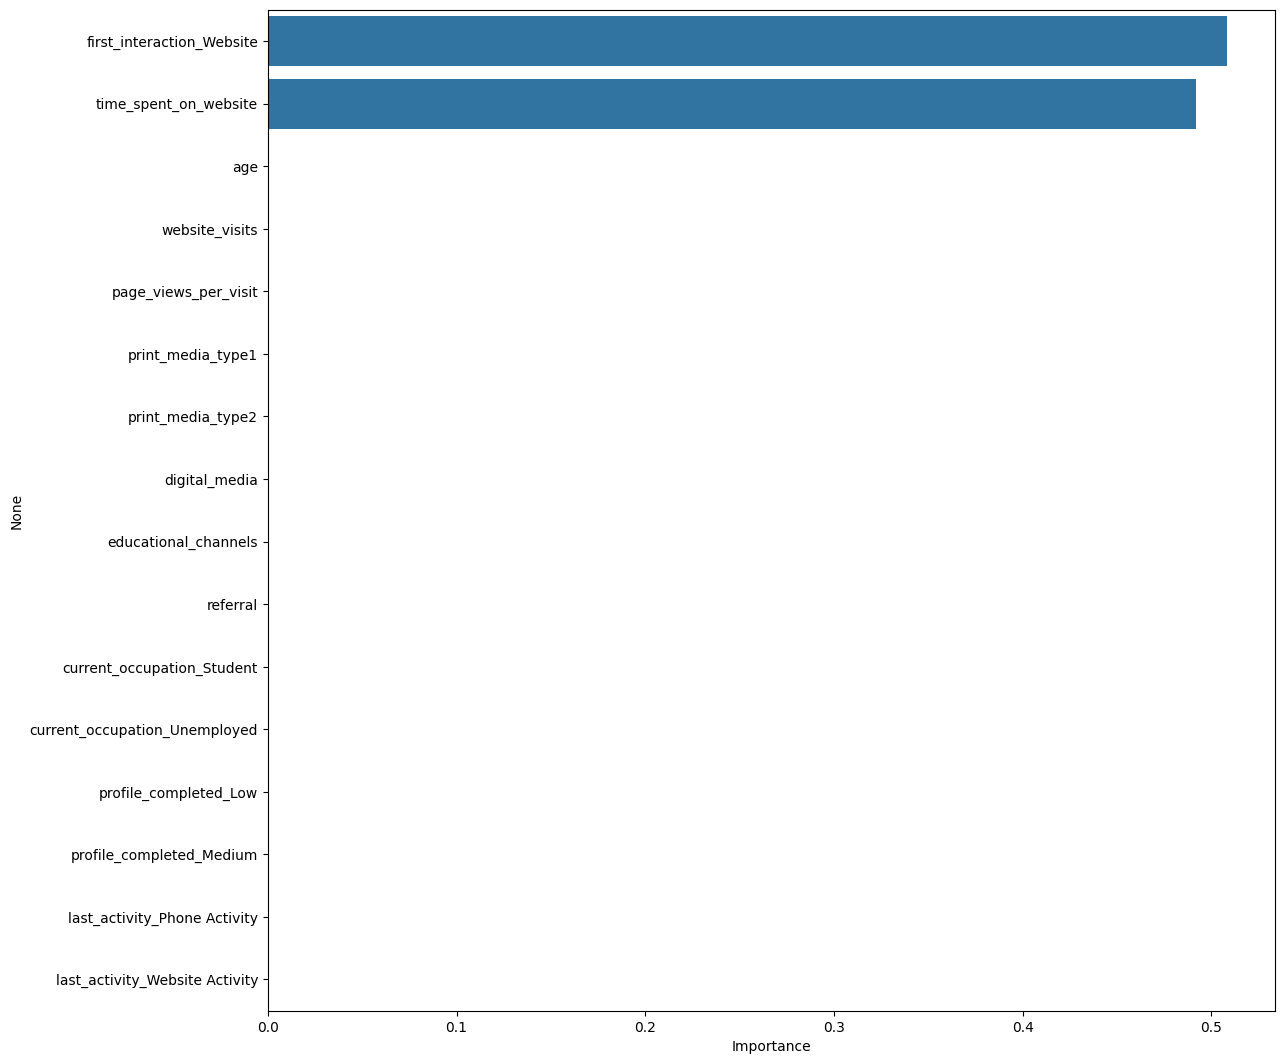

In [100]:
importances = dtree_estimator.feature_importances_
columns = X.columns

importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(13, 13))
sns.barplot(data=importance_df, x='Importance', y=importance_df.index)
plt.show()

- It looks like the tuned model thinks only two features are important
- The model has oversimplified the problem and introduced bias, thus not making it reliable to predict lead conversion

##### Plotting the feature importance and checking the level of importance for each feature - moving forward with the original model

<Axes: xlabel='Importance', ylabel='None'>

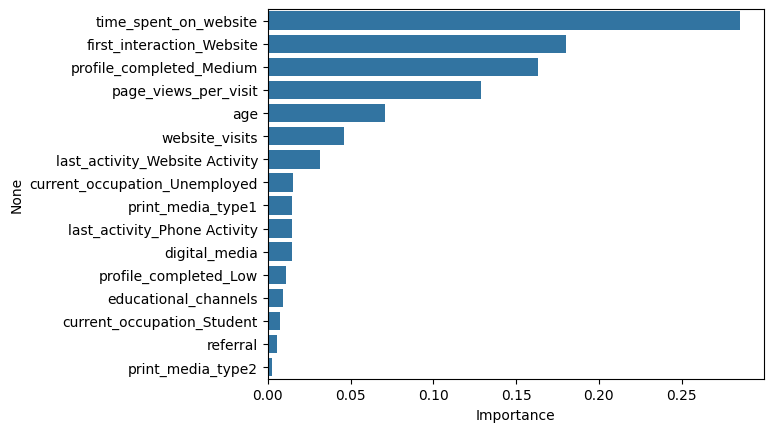

In [101]:
# Plot the feature importance

importances = dt.feature_importances_ #extracting the feature importance 
columns = X.columns #column names 
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False) #creating a new dataframe for the feature importances 
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index) #creating a barplot with each feature and its ranked importance 

- the graph shows time spent on the website is the most important feature followed by first_interaction_website followed by profile_completed_medium
- The top 6 features aside from age suggest the interaction with the website play a key role in a lead becoming a paying customer

##### Plotting the tree - with a depth of 4

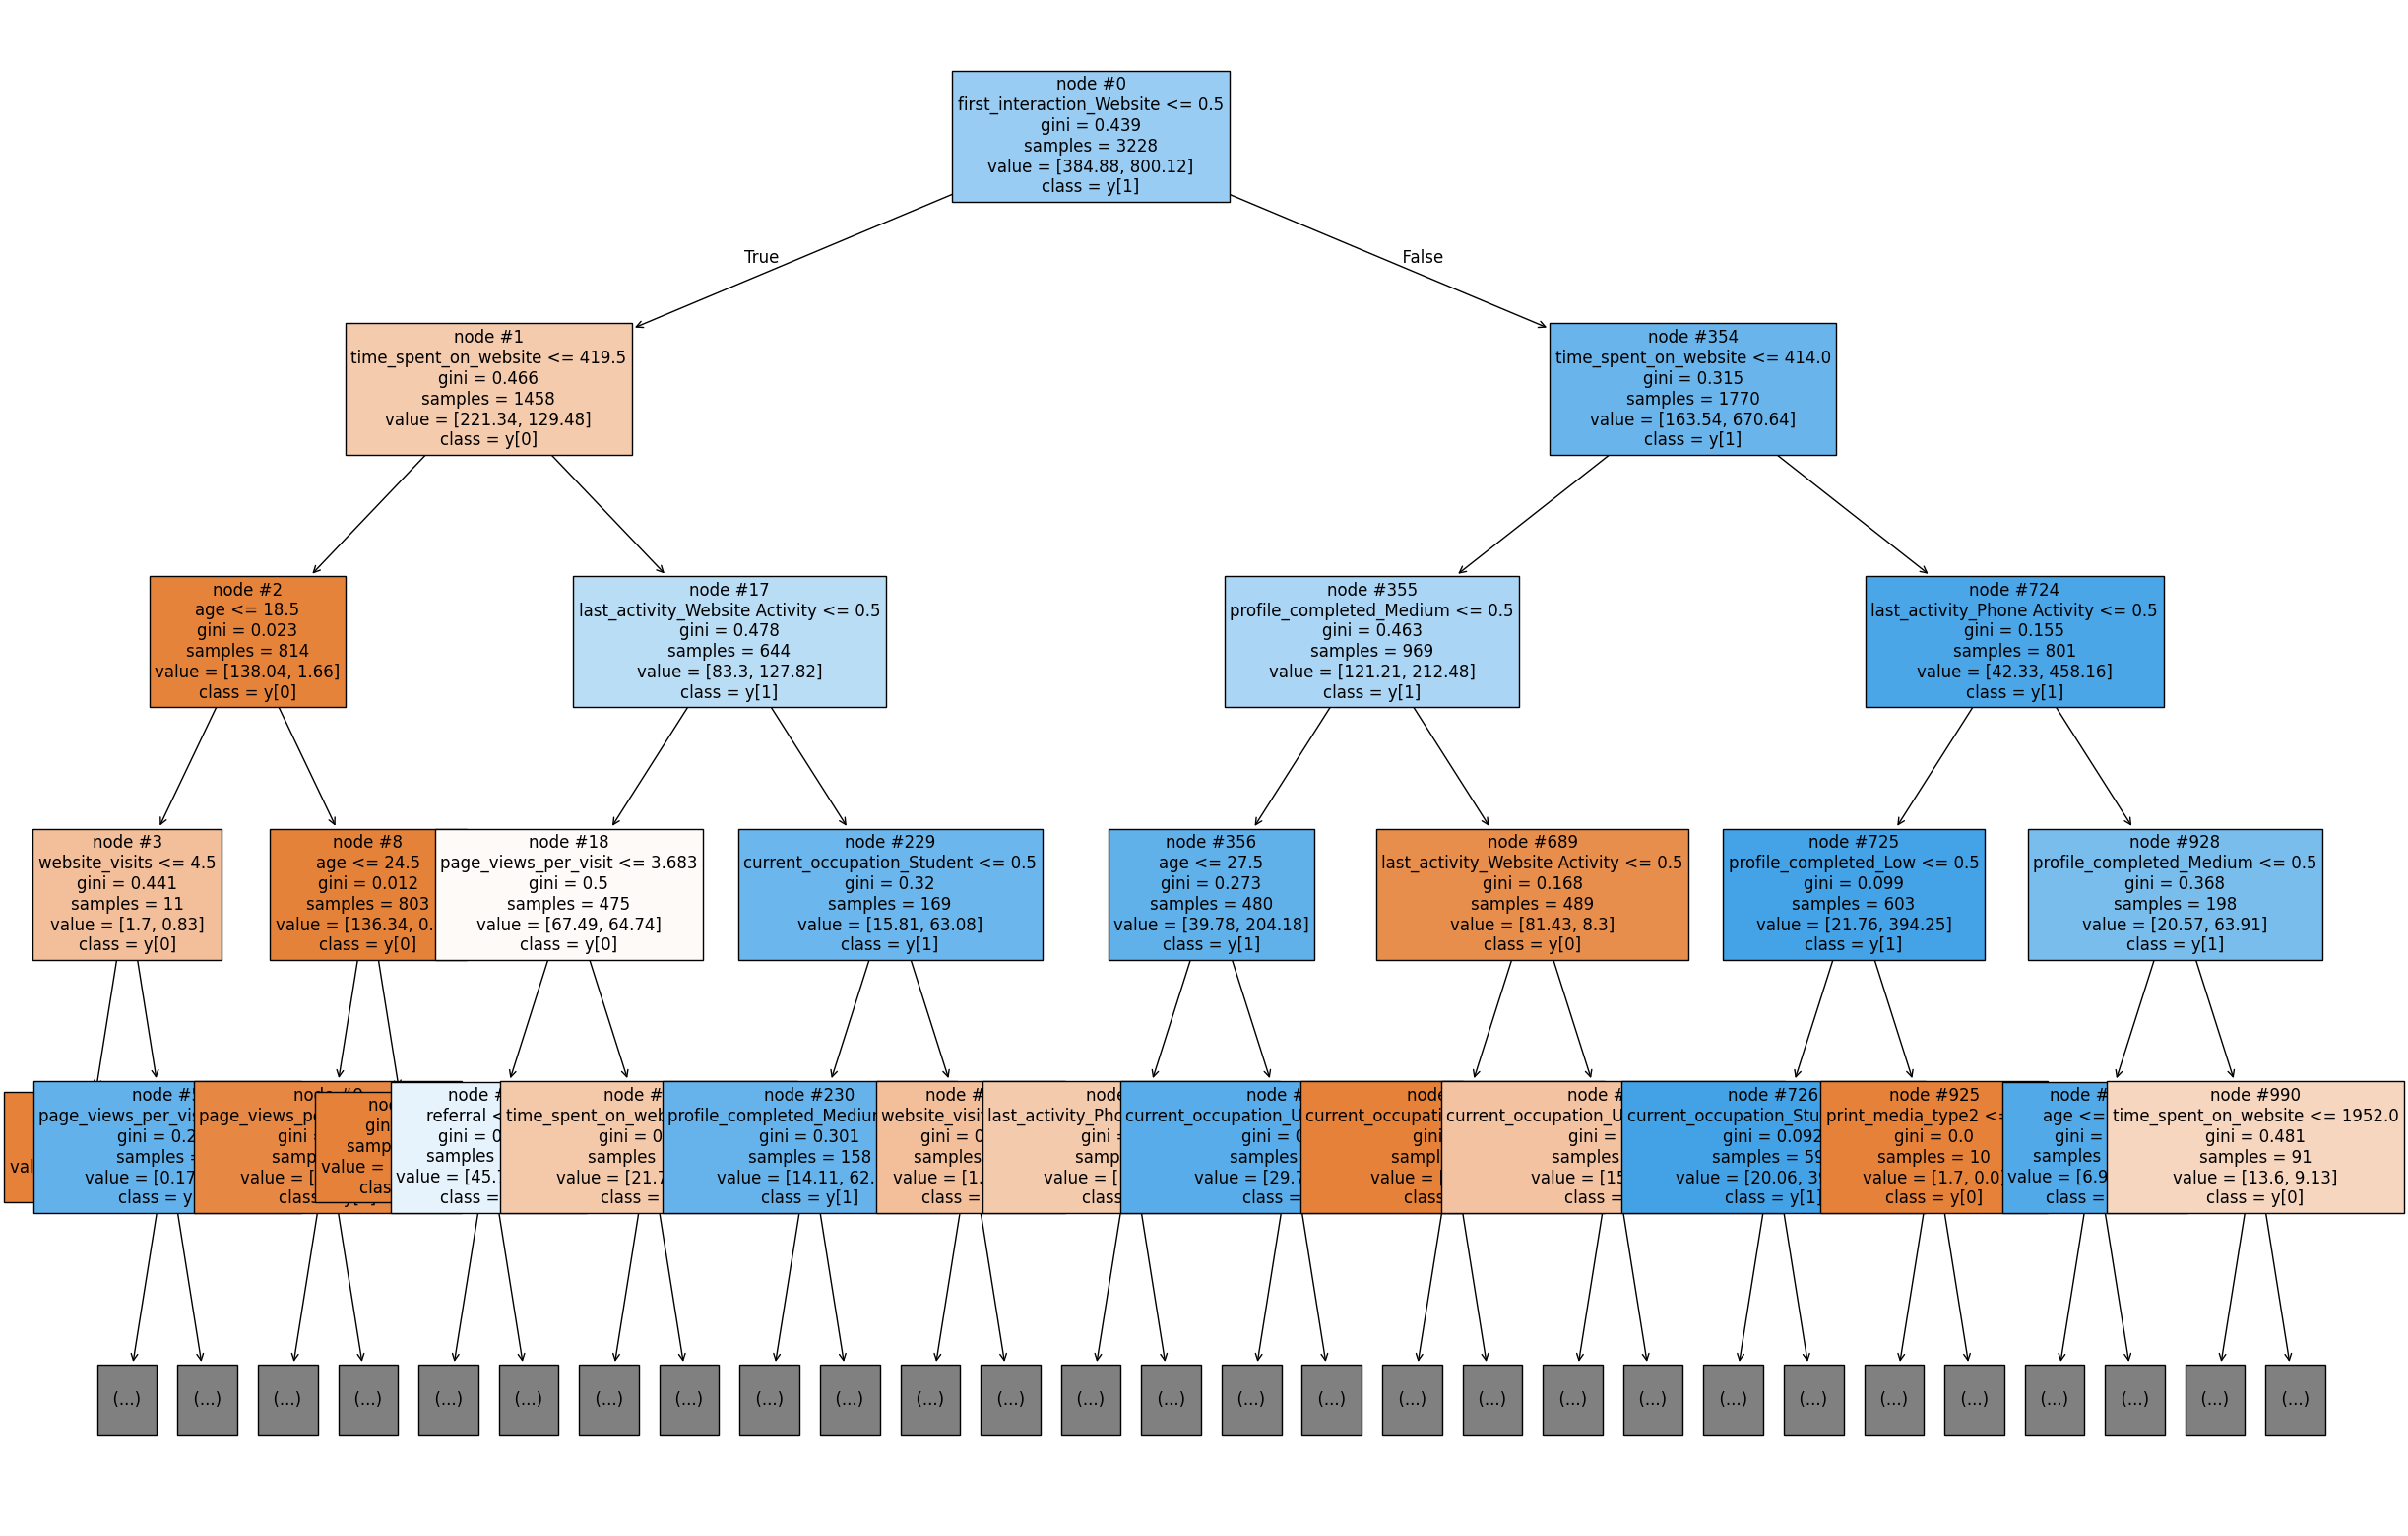

In [102]:
features = list(X.columns) #creating a list of feature names 

plt.figure(figsize = (30, 20)) #resizing 

tree.plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True) #plotting tree with a max depth of 4

plt.show()

I see the difference in the classes for each node. class y[1] seems to represent a paying lead status while class y[0] seems to represent a non paying lead 

## Do we need to prune the tree?

- I think I should prune the tree. I see multiple splits on time_spent_on_website and last_website_activity which suggests overfitting. I also see low Gini values such as 0.09 and 0.0 in some splits. I believe the tree should be pruned
- Although the feature importance graph seems reasonably distributed, I think there is some bias towards class 0 due to the metrics, and I think believe there is a good chance of high variance since it is a singular decision tree. With this in mind, I believe the tree can be pruned. 


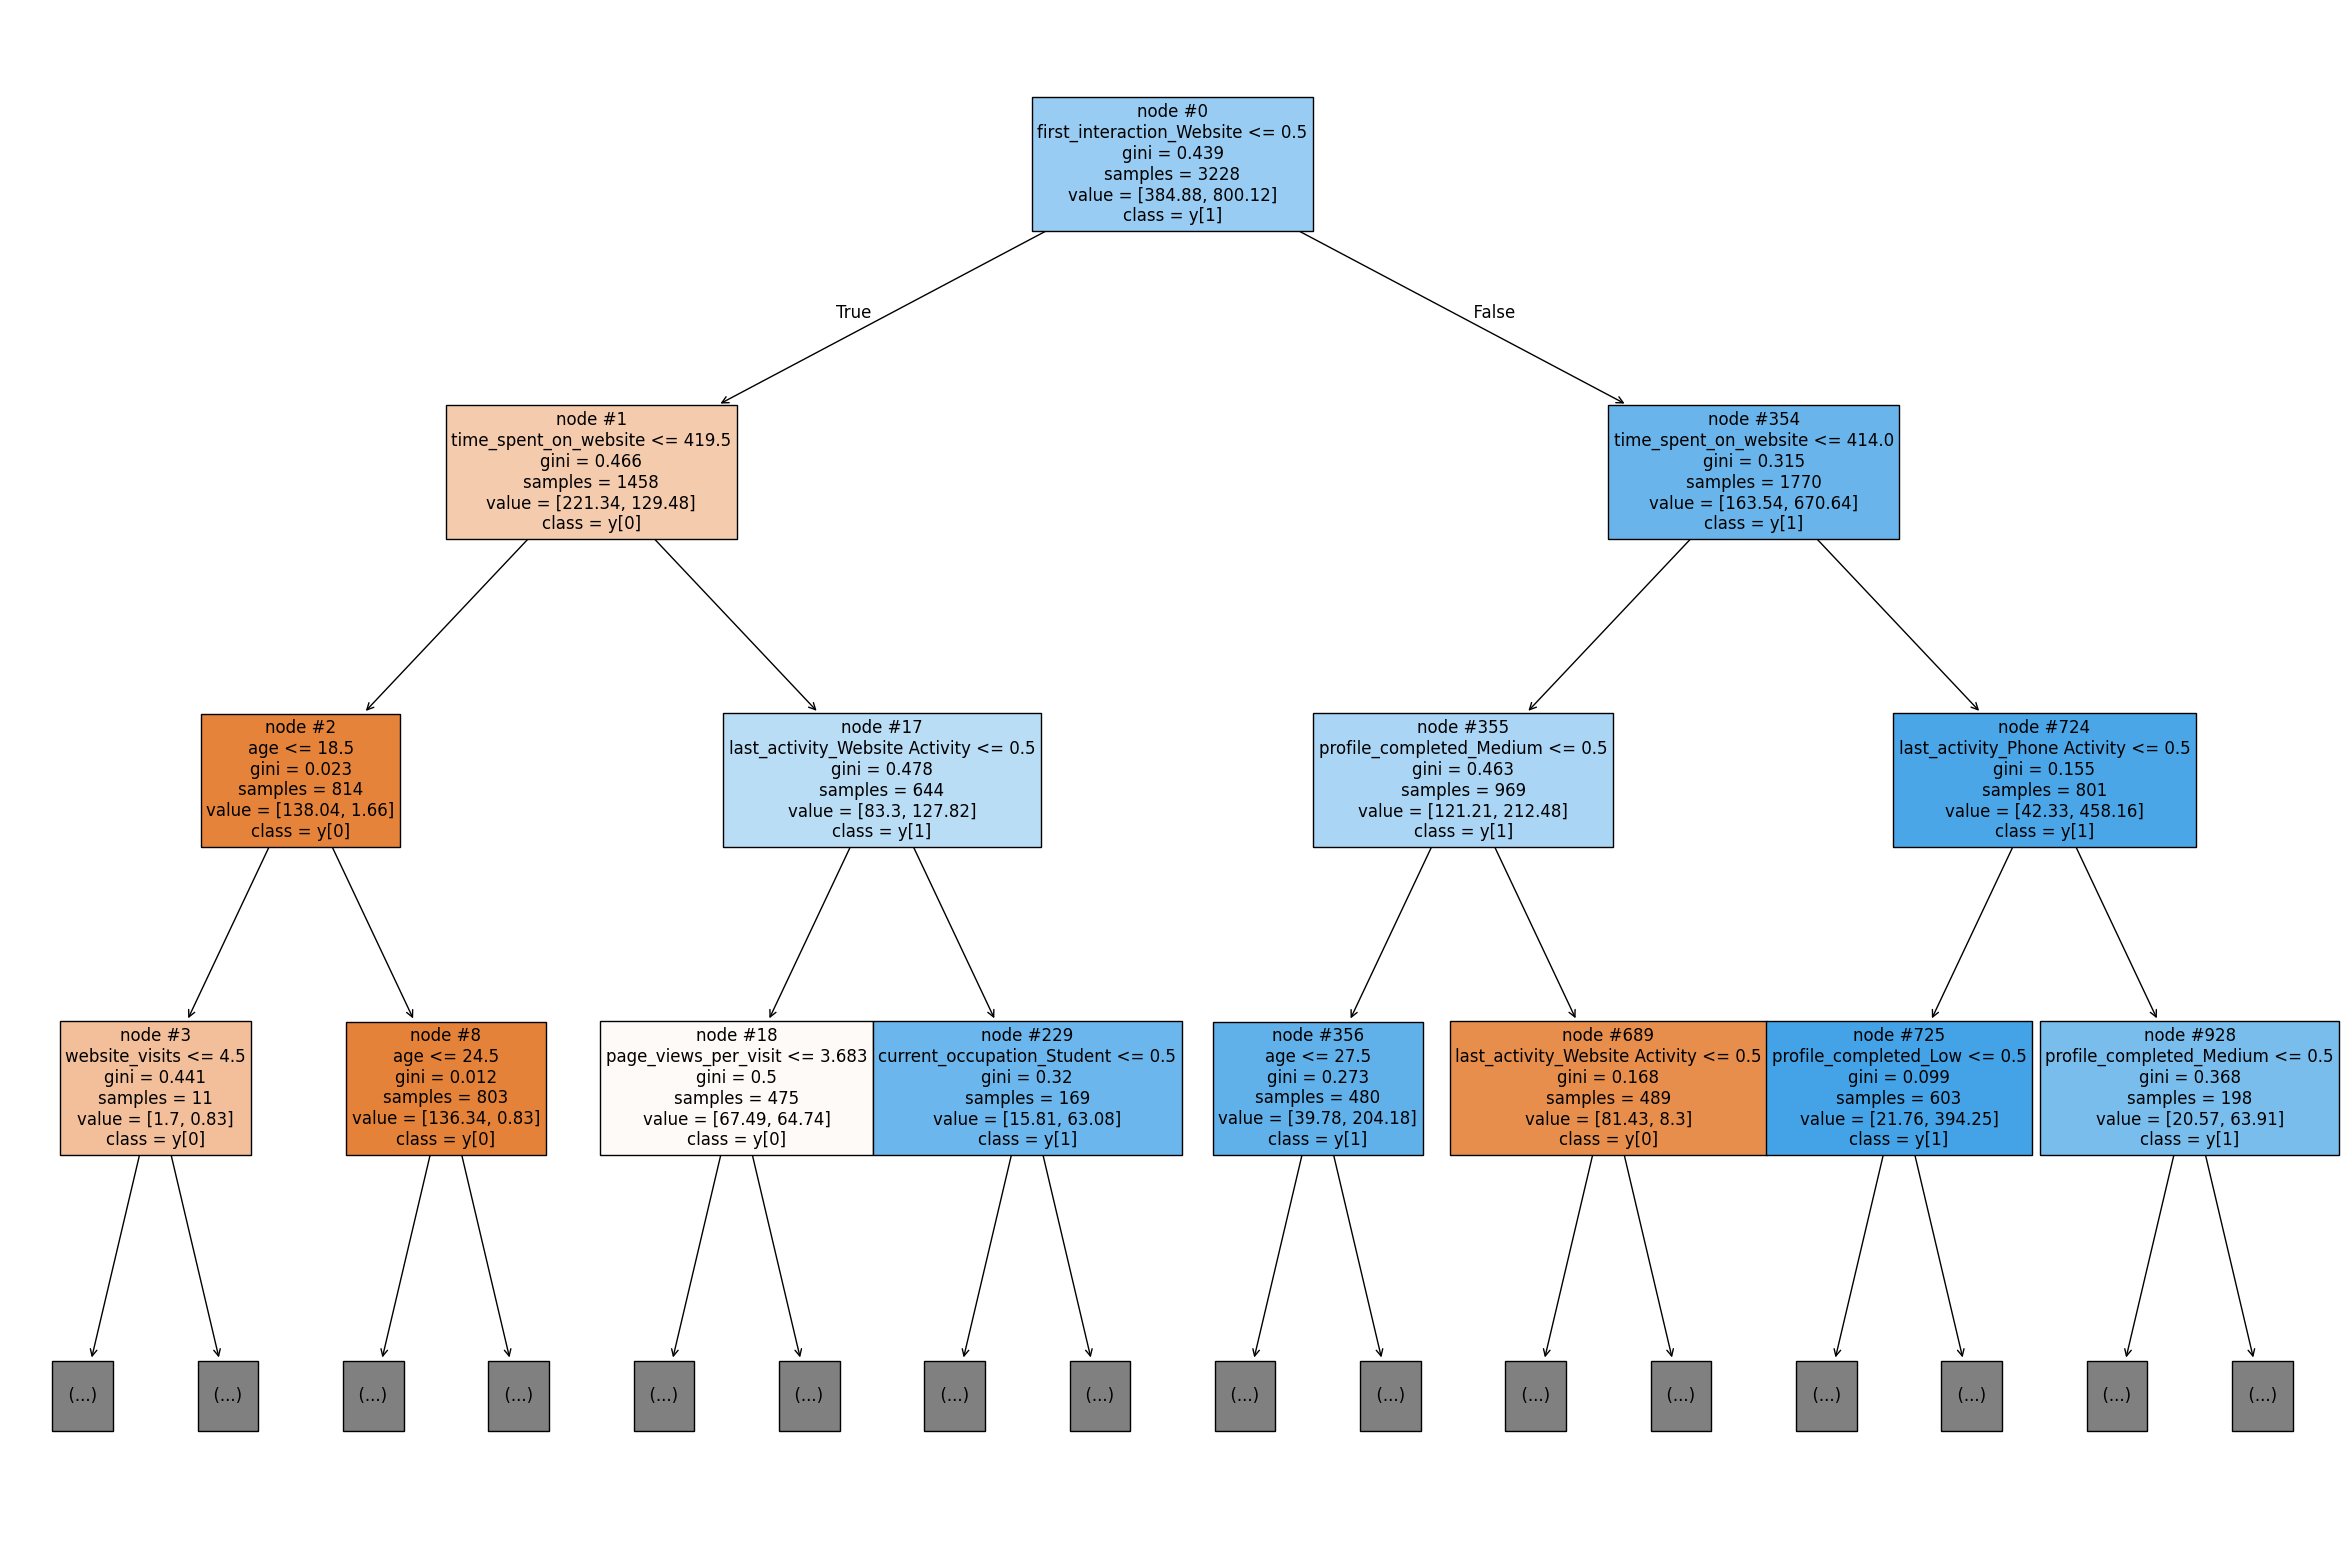

In [103]:
plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth = 3, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True) #re plotting with a depth of 3 

plt.show()

I feel like this tree also has the opportunity to be pruned, but I see a more balanced tree depth. I would get rid of the split on node #724 because it seems redudant but overall the tree seems to be an improvement from the first tree. 

## Building a Random Forest model

In [104]:
# Fitting the Random Forest classifier on the training data and modifying the class weight 
rf_estimator = RandomForestClassifier(class_weight = {0: 0.15, 1: 0.85}, random_state = 1) 

rf_estimator.fit(X_train, y_train) #training the classifier 

RandomForestClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



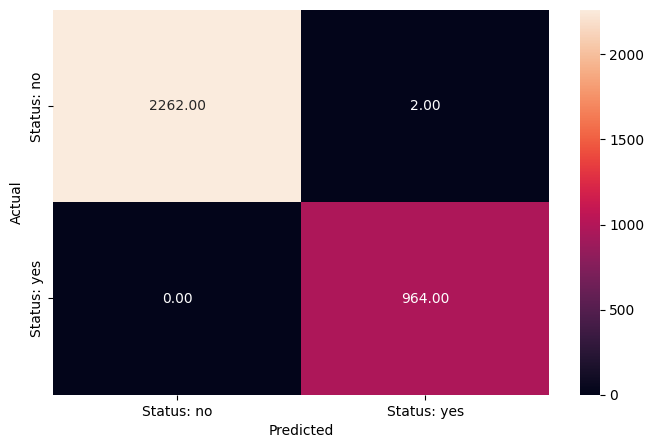

In [105]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train) #generating predictions with X_train 

metrics_score(y_train, y_pred_train_rf) #displaying metrics 

For all the metrics in the training dataset, the Random Forest gives  100%

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       971
           1       0.79      0.71      0.75       413

    accuracy                           0.86      1384
   macro avg       0.84      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



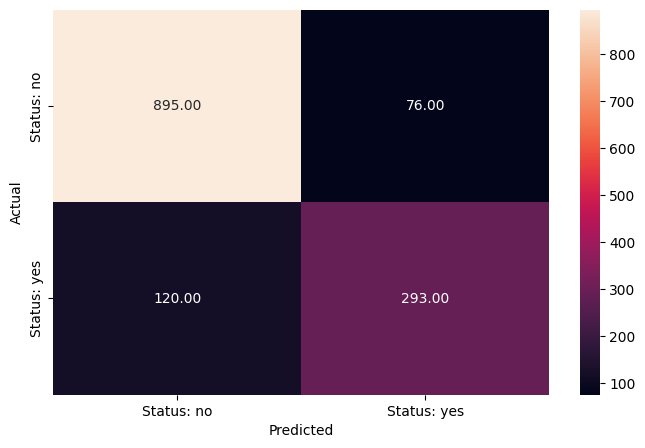

In [106]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test) #generating predictions with X_test

metrics_score(y_test, y_pred_test_rf)

Observations:
    - The random forest classifier seems to be overfitting the training data. For class 1 the recall is 76 on the test data while it is 100 on the training data
    - The precision is 0.88 for class 0 and 0.79 for class 1 which means there is a 12% chance the model will predict a lead will be a paying customer while they are not and a 21% chance the model will predict a lead will NOT be a paying customer while they are 

##### Checking feature importance of the random forest model 

<Axes: xlabel='Importance', ylabel='None'>

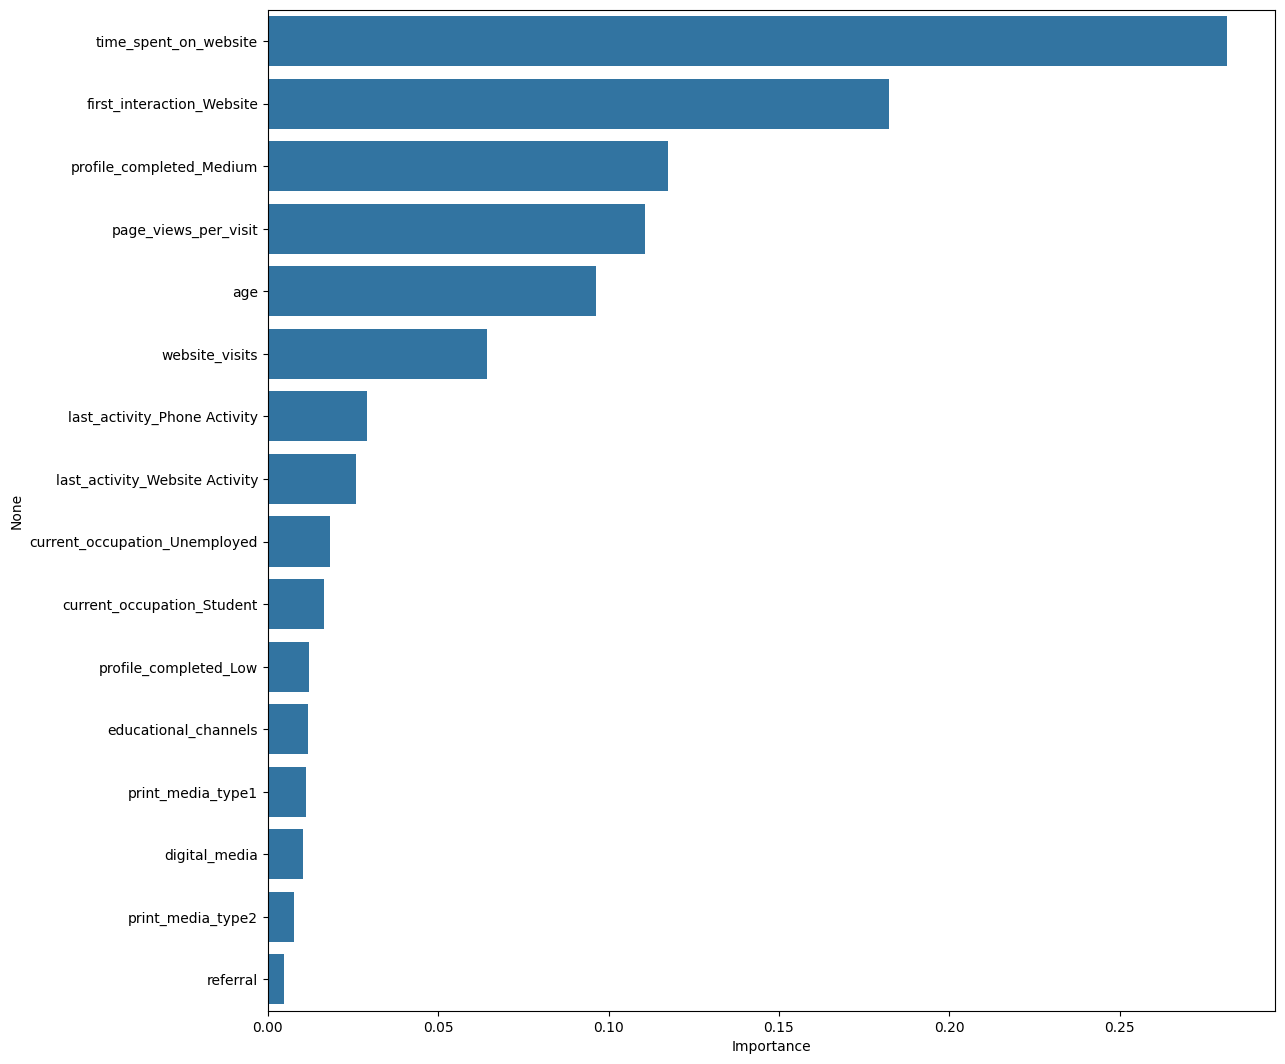

In [107]:
importances = rf_estimator.feature_importances_ #extracting feature importances 
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False) #creating dataframe for feature importances 
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index) #plotting feature importances 

- The random forest confirms the decision tree's notion that time_spent_on_website is the most important feature
- I see a somewhat equal distrubution of the top 6 important features aside from age having to do with some sort of interaction with the website 
- It seems interaction through the website is the most important and works the most (Question 3)

### Tuning the random forest model

In [108]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

# Grid of parameters to choose from
params_rf = {  
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      2264
           1       0.85      0.99      0.91       964

    accuracy                           0.94      3228
   macro avg       0.92      0.96      0.94      3228
weighted avg       0.95      0.94      0.95      3228



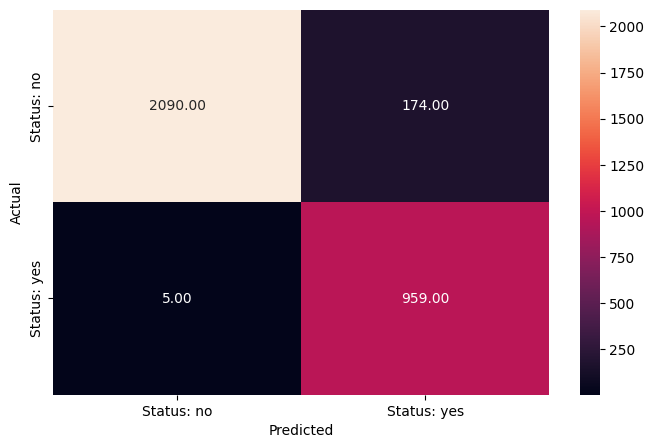

In [109]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

- This model shows decent performance on training data so far. It isn't too overfit, but at the same time there is relatively high precision and recall for each class

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       971
           1       0.71      0.79      0.75       413

    accuracy                           0.84      1384
   macro avg       0.81      0.83      0.82      1384
weighted avg       0.85      0.84      0.84      1384



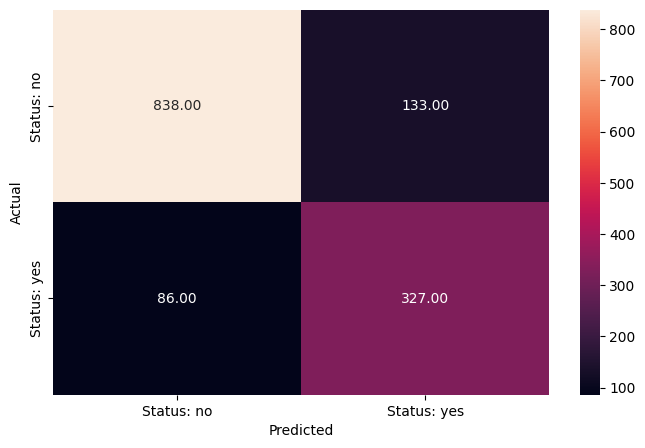

In [110]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

- Although the tuned model was slightly less overfit on the training dataset in comparison to the default model, I think it is performing similarly on the testing dataset. 
- It is performing very similar as the original model for class 0, but I think it has higher precision and recall for class 1 so I think it is an overall improvement. 
- This is the best performing model so far

<Axes: xlabel='Importance', ylabel='None'>

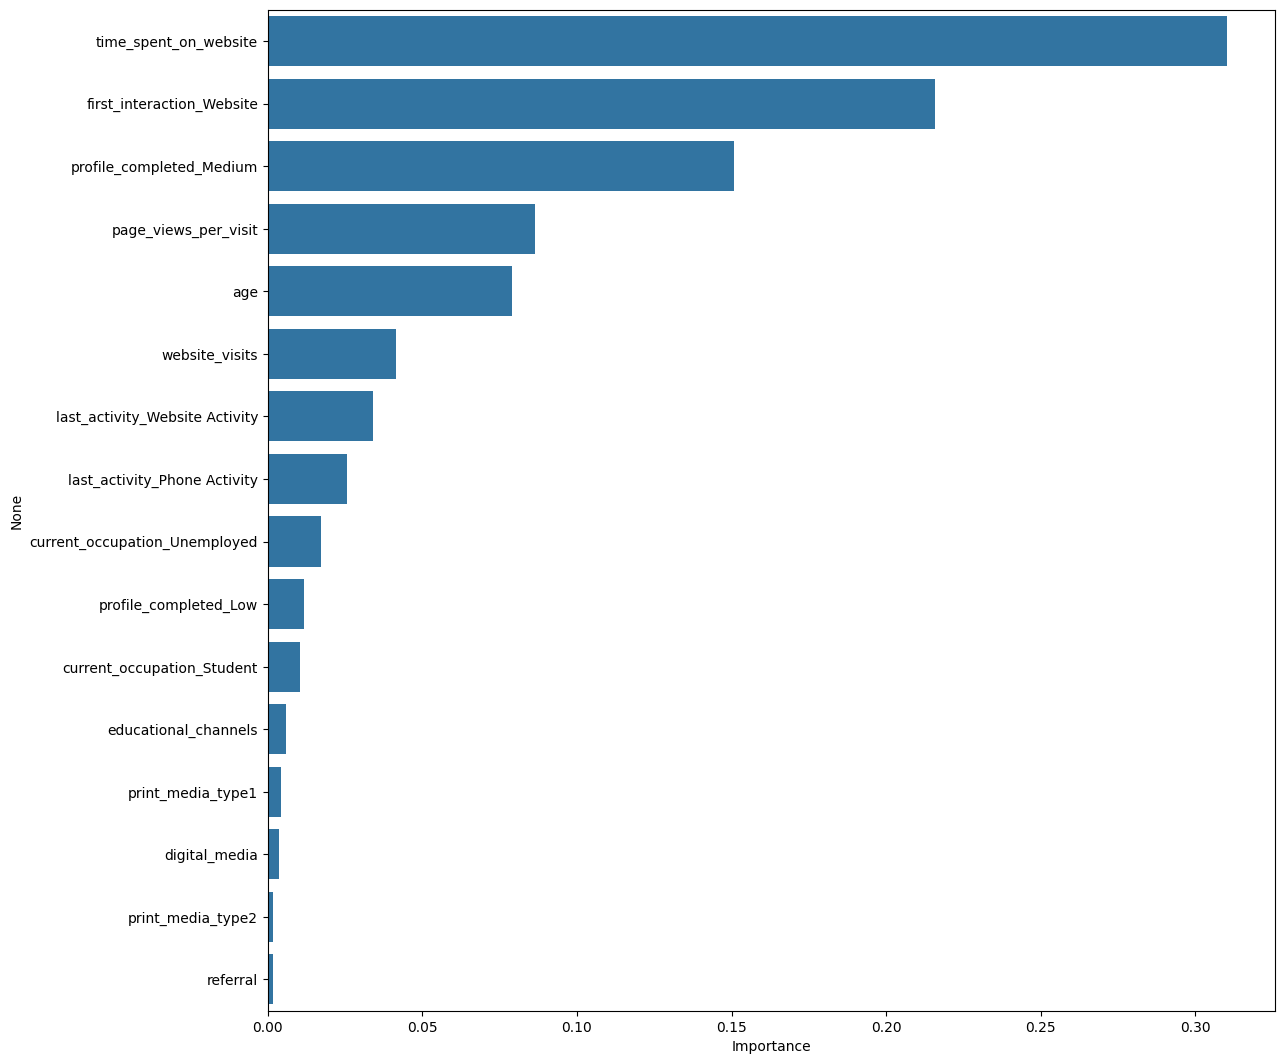

In [111]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

- The feature importance seems very similar for both the tuned and original model
- It still confirms the notion that interaction with the website is a key factor in lead conversion 

## Do we need to prune the tree?

- I don't think we need to prune because I think there is a good bias-variance tradeoff in Random Forest Models. The multiple decision tress involved lower the bias and the variance seems controlled since random forest averages multiple trees

## Actionable Insights and Recommendations

I was able to create a Decision Tree and Random Forests model above to help identify which leads are more likely to convert to paid customers 
- Some things I was able to conclude: 
    - Time spent on the website and general interaction with the website, which includes profile completion, are factors driving the lead conversion process
    - Students are not too likely to convert to paying customers 
    - Professionals are more likely than any other occupation to convert to paying customers 
    - Age is a driving factor in the conversion process, and since professionals are more likely to convert it seems older age leads (30+) are part of the expected group of people who would convert 
    - Although they were not classified as an important feature, leads with a referral are much more likely to convert to paying customers 
    - Ads, educational channels, and digital media aren't directly too important in converting leads whereas the first interaction with the company through the website seems to be an important factor 
    

Profile of leads likely to convert:
- Professionals who are above the age of 30
- Anyone with an above average rate of interaction with the website - profile completion, time spent on website, page views per visit
- Although the classifier did not classify referrals as important, there does seem to be a better rate of conversion with leads who have a referral - Leads with a referral


Recommendations:
- The first thing that came to my mind was improving in the areas where leads are not generated from. 
- I think the company should offer something different to students, since professionals are more likely to convert. A program directed to benefitting students would help in converting more students. 
- Since website interaction can help with lead conversion, I think making the website more engaging would definitely help convert leads to paying customers 
- In addition, I think the company might need better ads to draw people to their website where they showcase their product. I think advertising engagement with the website to understand the company's project in comparison to directly advertising just the company might help in lead conversion 
- I think the mobile app might need improvement, since it seems to be the website driving conversions instead of the mobile app
    - I think this might tie in with age, since a bit of an older crowd is more likely to convert I think they are more likely to use a website to interact with the company rather than a mobile app. 
- Since profile completion was an important feature, I think incentivizing profile completion would help in lead conversion 
